# Parte 3

#### 3.1 Raccolta dei dati

Il dataset fornito contiene dati storici sul DAX, che rappresentano prezzi o indici di mercato rilevanti.<br> 
La raccolta e la gestione adeguata di tali dati sono fondamentali per analizzare le dipendenze tra strumenti finanziari tramite modelli di copula.<br> 
Utilizzeremo questi dati per calcolare i rendimenti giornalieri, un passaggio necessario per la modellazione delle dipendenze.

#### 3.2 Pulizia e pre-elaborazione dei dati

I dati finanziari spesso includono anomalie come valori mancanti o outlier che devono essere gestiti prima dell'analisi. <br>
Implementeremo le seguenti tecniche di pulizia dei dati:<br>
- **Gestione dei Valori Mancanti**: Rimuoveremo eventuali righe con valori mancanti per evitare distorsioni.<br>
- **Gestione degli Outlier**: Utilizzeremo tecniche di filtraggio per identificare ed eliminare gli outlier, assicurando che l'analisi si concentri sui valori centrali più rappresentativi.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('DAX_3Y-1M.csv',index_col='DateTime',parse_dates=True)
display(data)

C:\Users\andre\AppData\Local\Temp\ipykernel_28332\4197107356.py:7: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('DAX_3Y-1M.csv',index_col='DateTime',parse_dates=True)


,Open,High,Low,Close,Unnamed: 5
DateTime,,,,,
02/01/2020 01:15:00 +01:00,13174,"13194,5","13171,5","13177,5",NaN
02/01/2020 01:16:00 +01:00,13177,13185,13177,"13180,5",NaN
02/01/2020 01:17:00 +01:00,"13180,5","13181,5",13179,"13181,5",NaN
02/01/2020 01:18:00 +01:00,"13181,5",13182,13180,13182,NaN
02/01/2020 01:19:00 +01:00,13182,13183,"13180,5","13181,5",NaN
...,...,...,...,...,...
03/03/2022 09:10:00 +01:00,14019,14031,14010,14013,NaN
03/03/2022 09:11:00 +01:00,14013,14019,14000,14000,NaN
03/03/2022 09:12:00 +01:00,13999,14018,13999,14006,NaN


In [2]:
data.drop(columns=['Unnamed: 5'], inplace=True)
display(data)

,Open,High,Low,Close
DateTime,,,,
02/01/2020 01:15:00 +01:00,13174,"13194,5","13171,5","13177,5"
02/01/2020 01:16:00 +01:00,13177,13185,13177,"13180,5"
02/01/2020 01:17:00 +01:00,"13180,5","13181,5",13179,"13181,5"
02/01/2020 01:18:00 +01:00,"13181,5",13182,13180,13182
02/01/2020 01:19:00 +01:00,13182,13183,"13180,5","13181,5"
...,...,...,...,...
03/03/2022 09:10:00 +01:00,14019,14031,14010,14013
03/03/2022 09:11:00 +01:00,14013,14019,14000,14000
03/03/2022 09:12:00 +01:00,13999,14018,13999,14006


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 616397 entries, 02/01/2020 01:15:00 +01:00 to 03/03/2022 09:14:00 +01:00
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Open    616397 non-null  object
 1   High    616397 non-null  object
 2   Low     616397 non-null  object
 3   Close   616397 non-null  object
dtypes: object(4)
memory usage: 23.5+ MB


In [4]:
# Drop rows with missing values
data=data.dropna()
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 616397 entries, 02/01/2020 01:15:00 +01:00 to 03/03/2022 09:14:00 +01:00
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Open    616397 non-null  object
 1   High    616397 non-null  object
 2   Low     616397 non-null  object
 3   Close   616397 non-null  object
dtypes: object(4)
memory usage: 23.5+ MB


Osserviamo che non sono presenti righe con valori mancanti

In [5]:
# Verifica e gestione degli outlier tramite interquartile range (IQR)
data = data.replace(',', '.', regex=True).astype(float)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
filtered_data = data[~((data < (Q1 - 1.5 * IQR)) | 
                       (data > (Q3 + 1.5 * IQR))).any(axis=1)]
display(filtered_data)



,Open,High,Low,Close
DateTime,,,,
02/01/2020 01:15:00 +01:00,13174.0,13194.5,13171.5,13177.5
02/01/2020 01:16:00 +01:00,13177.0,13185.0,13177.0,13180.5
02/01/2020 01:17:00 +01:00,13180.5,13181.5,13179.0,13181.5
02/01/2020 01:18:00 +01:00,13181.5,13182.0,13180.0,13182.0
02/01/2020 01:19:00 +01:00,13182.0,13183.0,13180.5,13181.5
...,...,...,...,...
03/03/2022 09:10:00 +01:00,14019.0,14031.0,14010.0,14013.0
03/03/2022 09:11:00 +01:00,14013.0,14019.0,14000.0,14000.0
03/03/2022 09:12:00 +01:00,13999.0,14018.0,13999.0,14006.0


#### 3.3 Trasformazione dei dati

Dopo la pulizia, è necessario trasformare i dati per ottenere una scala uniforme.<br> 
Poiché i modelli di copula richiedono margini uniformi, trasformeremo i dati in rendimenti logaritmici per ottenere <br>
stazionarietà e calcoleremo i punteggi standardizzati:

In [6]:
# Calcolo dei rendimenti logaritmici
log_returns = np.log(filtered_data / filtered_data.shift(1)).dropna()
display(log_returns)

,Open,High,Low,Close
DateTime,,,,
02/01/2020 01:16:00 +01:00,0.000228,-0.000720,0.000417,0.000228
02/01/2020 01:17:00 +01:00,0.000266,-0.000265,0.000152,0.000076
02/01/2020 01:18:00 +01:00,0.000076,0.000038,0.000076,0.000038
02/01/2020 01:19:00 +01:00,0.000038,0.000076,0.000038,-0.000038
02/01/2020 01:20:00 +01:00,-0.000038,0.000114,0.000076,0.000228
...,...,...,...,...
03/03/2022 09:10:00 +01:00,-0.000642,0.000000,-0.000214,-0.000571
03/03/2022 09:11:00 +01:00,-0.000428,-0.000856,-0.000714,-0.000928
03/03/2022 09:12:00 +01:00,-0.001000,-0.000071,-0.000071,0.000428


In [7]:
log_returns.corr()

,Open,High,Low,Close
Open,1.000000,0.541102,0.538822,0.213082
High,0.541102,1.000000,0.477160,0.589994
Low,0.538822,0.477160,1.000000,0.584408
Close,0.213082,0.589994,0.584408,1.000000


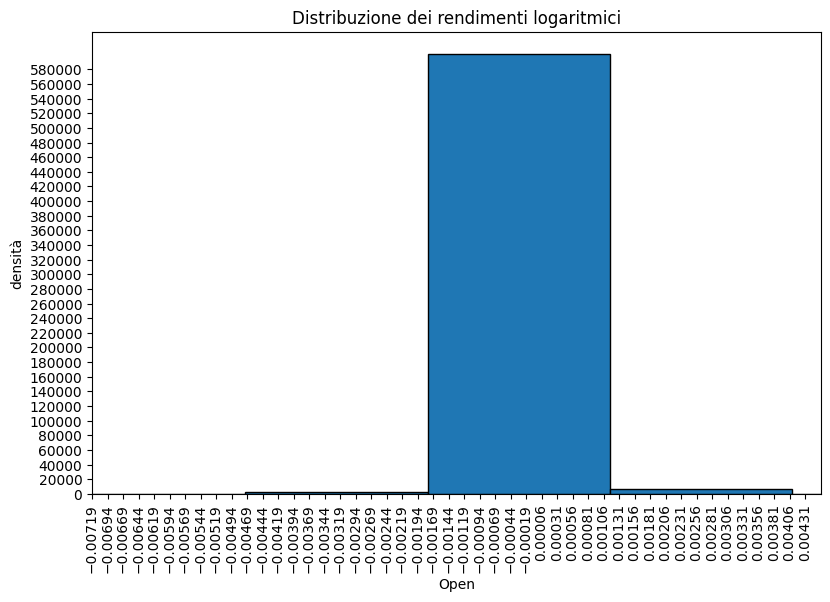

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(log_returns['Open'], bins=25, edgecolor='black')
plt.title('Distribuzione dei rendimenti logaritmici')
plt.xlabel('Open')
plt.ylabel('densità')
xticks_values = np.arange(-0.00719, 0.00456, 0.00025)
plt.xticks(ticks=xticks_values,rotation=90)
ax.set_aspect(aspect='auto')
ax.set_xlim([-0.00719, 0.00456])
fig.set_size_inches(len(xticks_values)*0.20, 6)
plt.yticks(ticks=np.arange(0,600000,20000))
plt.grid(False)
plt.show()

In [9]:
# Standardizzazione dei dati: calcolo dei punteggi Z
standardized_data = (log_returns - log_returns.mean()) / log_returns.std()
display(standardized_data)

,Open,High,Low,Close
DateTime,,,,
02/01/2020 01:16:00 +01:00,0.513283,-1.507703,0.853297,0.498567
02/01/2020 01:17:00 +01:00,0.598720,-0.555875,0.310070,0.166015
02/01/2020 01:18:00 +01:00,0.170871,0.079182,0.154914,0.082892
02/01/2020 01:19:00 +01:00,0.085317,0.158563,0.077349,-0.083337
02/01/2020 01:20:00 +01:00,-0.085772,0.237926,0.154896,0.498415
...,...,...,...,...
03/03/2022 09:10:00 +01:00,-1.447601,-0.000208,-0.437935,-1.250808
03/03/2022 09:11:00 +01:00,-0.965660,-1.791008,-1.459979,-2.033947
03/03/2022 09:12:00 +01:00,-2.254511,-0.149511,-0.146241,0.938654


In [10]:
standardized_data.corr()

,Open,High,Low,Close
Open,1.000000,0.541102,0.538822,0.213082
High,0.541102,1.000000,0.477160,0.589994
Low,0.538822,0.477160,1.000000,0.584408
Close,0.213082,0.589994,0.584408,1.000000


#### 3.4 Normalizzazione

Per applicare correttamente i modelli di copula, i dati devono essere trasformati in una distribuzione uniforme sull'intervallo [0, 1].<br>
 Questo passaggio permette ai dati di adattarsi meglio alla funzione di copula che verrà utilizzata per modellare le dipendenze:

In [11]:
# Normalizzazione tramite la funzione di distribuzione cumulativa (CDF)
uniform_data = norm.cdf(standardized_data)
display(uniform_data)


array([[0.69612324, 0.06581532, 0.80325258, 0.69095767],
       [0.7253202 , 0.28914825, 0.6217461 , 0.56592753],
       [0.56783755, 0.53155597, 0.56155544, 0.53303114],
       ...,
       [0.01208201, 0.44057533, 0.44186549, 0.82604578],
       [0.90116376, 0.32701177, 0.279459  , 0.68048837],
       [0.62618555, 0.7722743 , 0.97951894, 0.95725093]])

In [12]:
correlation_matrix = np.corrcoef(uniform_data.T)
display(correlation_matrix)

array([[1.        , 0.56908115, 0.57490319, 0.12791592],
       [0.56908115, 1.        , 0.62031326, 0.61776319],
       [0.57490319, 0.62031326, 1.        , 0.61597007],
       [0.12791592, 0.61776319, 0.61597007, 1.        ]])